# 基于CNN模型的物体识别

## 1.复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

## 2.回答以下理论题目?

### 2.1. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

隐藏层一共有 5*5*50+50=1300 个参数

### 2.2. What are "local invariant" and "parameter sharing" ?

local invariant 是空间不变性，指的是图像中需要被识别的物体，无论出于图像中的任何方位，均可以被识别。
parameter sharing 是参数共享，指的是对一张图像进行一次卷积时，使用同一个卷积核作为权重进行卷积，即每一层使用一个卷积核进行计算。

### 2.3. Why we use batch normalization ?

可以让我们在深度学习网络中使用更高的学习率以及降低模型对初始化的依赖程度。

### 2.4. What problem does dropout try to solve ?

为了解决深度网络中产生的梯度消失或梯度爆炸的现象

## 3. 实践题

### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [28]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Load the dataset. 

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

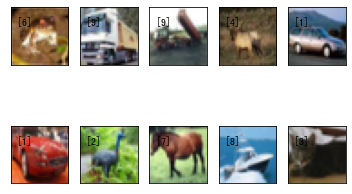

In [3]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1])
    plt.text(3,10,str(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

##### It is your time to build your model. Try your best to build a model with good performance on the test set.

In [4]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(set(list(y_train.flatten())))

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [9]:
# VGG Net
input_data = keras.Input(shape=(x_train.shape[1:]))
h = Conv2D(64, (3, 3), activation='relu', padding='same')(input_data)
h = Conv2D(64, (3, 3), activation='relu', padding='same')(h)
h = MaxPooling2D((2,2))(h)
h = Conv2D(128, (3, 3), activation='relu', padding='same')(h)
h = Conv2D(128, (3, 3), activation='relu', padding='same')(h)
h = MaxPooling2D((2,2))(h)
h = Conv2D(256, (3, 3), activation='relu', padding='same')(h)
h = Conv2D(256, (3, 3), activation='relu', padding='same')(h)
h = Conv2D(256, (3, 3), activation='relu', padding='same')(h)
h = MaxPooling2D((2,2))(h)
h = Conv2D(512, (3, 3), activation='relu', padding='same')(h)
h = Conv2D(512, (3, 3), activation='relu', padding='same')(h)
h = Conv2D(512, (3, 3), activation='relu', padding='same')(h)
h = MaxPooling2D((2,2))(h)
h = Conv2D(512, (3, 3), activation='relu', padding='same')(h)
h = Conv2D(512, (3, 3), activation='relu', padding='same')(h)
h = Conv2D(512, (3, 3), activation='relu', padding='same')(h)
h = MaxPooling2D((2,2))(h)
h = Flatten()(h)
h = Dense(512, activation='relu')(h)
h = Dense(512, activation='relu')(h)
h = Dense(512, activation='relu')(h)
output = Dense(10, activation='softmax')(h)

model = keras.Model(inputs=input_data, outputs=output)
model.summary()
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 128)         0   

In [10]:
preds = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 38s 962us/sample - loss: 2.3606 - accuracy: 0.0998 - val_loss: 2.3609 - val_accuracy: 0.1003
Epoch 2/10
40000/40000 [==============================] - 38s 951us/sample - loss: 2.3612 - accuracy: 0.0999 - val_loss: 2.3609 - val_accuracy: 0.1003
Epoch 3/10
40000/40000 [==============================] - 38s 945us/sample - loss: 2.3612 - accuracy: 0.0999 - val_loss: 2.3609 - val_accuracy: 0.1003
Epoch 4/10
40000/40000 [==============================] - 38s 941us/sample - loss: 2.3612 - accuracy: 0.0999 - val_loss: 2.3609 - val_accuracy: 0.1003
Epoch 5/10
40000/40000 [==============================] - 39s 982us/sample - loss: 2.3612 - accuracy: 0.0999 - val_loss: 2.3609 - val_accuracy: 0.1003
Epoch 6/10
40000/40000 [==============================] - 40s 1ms/sample - loss: 2.3612 - accuracy: 0.0999 - val_loss: 2.3609 - val_accuracy: 0.1003
Epoch 7/10
40000/40000 [======================

10000/10000 - 3s - loss: 2.3612 - accuracy: 0.1000
0.1


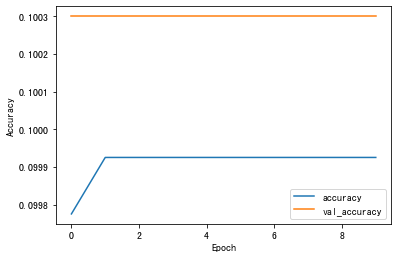

In [12]:
plt.plot(preds.history['accuracy'], label='accuracy')
plt.plot(preds.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

In [3]:
input_data = keras.Input(shape=(x_train.shape[1:]))
h = Conv2D(64, (3, 3), activation='relu', padding='same')(input_data)
h = MaxPooling2D((2,2))(h)
h = Conv2D(128, (3, 3), activation='relu', padding='same')(h)
h = MaxPooling2D((2,2))(h)
h = Conv2D(256, (3, 3), activation='relu', padding='same')(h)
h = MaxPooling2D((2,2))(h)
h = Conv2D(512, (3, 3), activation='relu', padding='same')(h)
h = MaxPooling2D((2,2))(h)
h = Flatten()(h)
h = Dense(512, activation='relu')(h)
output = Dense(10)(h)

model = keras.Model(inputs=input_data, outputs=output)
model.summary()
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0     

In [4]:
preds = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 13s 318us/sample - loss: 1.7705 - accuracy: 0.4430 - val_loss: 1.4301 - val_accuracy: 0.4875
Epoch 2/10
40000/40000 [==============================] - 9s 222us/sample - loss: 1.1665 - accuracy: 0.5871 - val_loss: 1.2407 - val_accuracy: 0.5604
Epoch 3/10
40000/40000 [==============================] - 10s 242us/sample - loss: 1.0014 - accuracy: 0.6497 - val_loss: 1.0308 - val_accuracy: 0.6420
Epoch 4/10
40000/40000 [==============================] - 9s 235us/sample - loss: 0.8827 - accuracy: 0.6901 - val_loss: 1.0138 - val_accuracy: 0.6593
Epoch 5/10
40000/40000 [==============================] - 10s 238us/sample - loss: 0.7862 - accuracy: 0.7262 - val_loss: 0.9558 - val_accuracy: 0.6795
Epoch 6/10
40000/40000 [==============================] - 9s 231us/sample - loss: 0.7088 - accuracy: 0.7538 - val_loss: 0.9925 - val_accuracy: 0.6852
Epoch 7/10
40000/40000 [=======================

10000/10000 - 1s - loss: 1.1590 - accuracy: 0.6803
0.6803


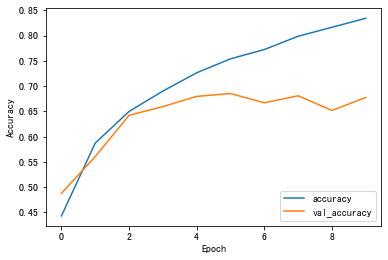

In [5]:
plt.plot(preds.history['accuracy'], label='accuracy')
plt.plot(preds.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

In [32]:
input_data = keras.Input(shape=(x_train.shape[1:]))
h = Conv2D(32, (3, 3), activation='relu')(input_data)
h = MaxPooling2D((2,2))(h)
h = Conv2D(64, (3, 3), activation='relu')(h)
h = MaxPooling2D((2,2))(h)
h = Conv2D(64, (3, 3), activation='relu')(h)
h = Flatten()(h)
h = Dense(40, activation='relu')(h)
output = Dense(10)(h)

model = keras.Model(inputs=input_data, outputs=output)
model.summary()
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_12 (Flatten)         (None, 1024)              0  

In [37]:
preds = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))# validation_split=0.1

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 116us/sample - loss: 0.7291 - accuracy: 0.7460 - val_loss: 1.0516 - val_accuracy: 0.6588
Epoch 2/10
50000/50000 [==============================] - 6s 114us/sample - loss: 0.6934 - accuracy: 0.7593 - val_loss: 1.0708 - val_accuracy: 0.6614
Epoch 3/10
50000/50000 [==============================] - 6s 117us/sample - loss: 0.6624 - accuracy: 0.7691 - val_loss: 1.1229 - val_accuracy: 0.6565
Epoch 4/10
50000/50000 [==============================] - 6s 116us/sample - loss: 0.6379 - accuracy: 0.7776 - val_loss: 1.1442 - val_accuracy: 0.6454
Epoch 5/10
50000/50000 [==============================] - 6s 115us/sample - loss: 0.6151 - accuracy: 0.7872 - val_loss: 1.0817 - val_accuracy: 0.6764
Epoch 6/10
50000/50000 [==============================] - 6s 114us/sample - loss: 0.5923 - accuracy: 0.7944 - val_loss: 1.1240 - val_accuracy: 0.6606
Epoch 7/10
50000/50000 [==========================

10000/10000 - 1s - loss: 1.2360 - accuracy: 0.6683
0.6683


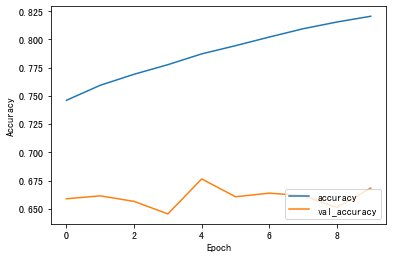

In [38]:
plt.plot(preds.history['accuracy'], label='accuracy')
plt.plot(preds.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

###  Congratulations! You hanve finished the assignment 3.   